In [2]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
#from intake import open_catalog
import cartopy.io.shapereader as shpreader
import mygrads as mg
#import Ngl
#import Nio
#import fiona
import matplotlib as mpl
import cartopy.mpl.ticker as cticker
from cartopy.util import add_cyclic_point
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from cartopy.feature import NaturalEarthFeature
from cartopy.feature import COASTLINE
from clim680_function import xyticks

In [3]:
f= '/project/xprecip/merra2_ncfiles/precip/resampled/precip_correct_dailyresample_10-6-22.nc'
daily_prcp=xr.open_dataset(f)
lon=daily_prcp['lon']
lat=daily_prcp['lat']
daily_prcp

<xarray.Dataset>
Dimensions:      (lat: 55, lon: 107, time: 3760)
Coordinates:
  * time         (time) datetime64[ns] 1980-01-01 1980-01-02 ... 2021-02-28
  * lon          (lon) float64 -126.9 -126.2 -125.6 ... -61.88 -61.25 -60.62
  * lat          (lat) float64 23.0 23.5 24.0 24.5 25.0 ... 48.5 49.0 49.5 50.0
Data variables:
    PRECTOTCORR  (time, lat, lon) float32 ...

In [5]:
daily_values=daily_prcp['PRECTOTCORR']
daily_values

<xarray.DataArray 'PRECTOTCORR' (time: 3760, lat: 55, lon: 107)>
[22127600 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 1980-01-01 1980-01-02 ... 2021-02-28
  * lon      (lon) float64 -126.9 -126.2 -125.6 -125.0 ... -61.88 -61.25 -60.62
  * lat      (lat) float64 23.0 23.5 24.0 24.5 25.0 ... 48.0 48.5 49.0 49.5 50.0

In [6]:
traditional_climo=daily_values.groupby('time.dayofyear').mean(dim='time')
traditional_climo

<xarray.DataArray 'PRECTOTCORR' (dayofyear: 92, lat: 55, lon: 107)>
array([[[0.00054088, 0.00057417, 0.00061676, ..., 0.00015636,
         0.00016622, 0.00016934],
        [0.00044879, 0.00045059, 0.00054475, ..., 0.0001365 ,
         0.00014654, 0.00015546],
        [0.0003653 , 0.00033801, 0.00041465, ..., 0.00012499,
         0.00012982, 0.0001359 ],
        ...,
        [0.00258332, 0.00254403, 0.00268394, ..., 0.00072098,
         0.00082659, 0.0009247 ],
        [0.00279214, 0.00281087, 0.00261665, ..., 0.00063546,
         0.00077911, 0.00086439],
        [0.00262787, 0.00193808, 0.00139414, ..., 0.00061566,
         0.00071145, 0.00073993]],

       [[0.00019792, 0.00020807, 0.00021511, ..., 0.00012034,
         0.00013695, 0.0001395 ],
        [0.00021433, 0.00020024, 0.00020283, ..., 0.00013657,
         0.0001413 , 0.00015103],
        [0.00027242, 0.00020939, 0.00020005, ..., 0.00015602,
         0.00014875, 0.00015499],
...
        [0.00237904, 0.00241903, 0.00252004, ..., 0.00074688,
         0.0008354 , 0.00089578],
        [0.00253518, 0.00250155, 0.00217799, ..., 0.0006855 ,
         0.00080517, 0.00087587],
        [0.00228918, 0.00167497, 0.00124186, ..., 0.00065488,
         0.00073034, 0.00078754]],

       [[0.00020822, 0.00019245, 0.00017744, ..., 0.0002914 ,
         0.00024504, 0.00023953],
        [0.00024846, 0.00020766, 0.00017839, ..., 0.00028527,
         0.00024858, 0.00025422],
        [0.00021623, 0.00019989, 0.0001982 , ..., 0.00030014,
         0.00025525, 0.0002588 ],
        ...,
        [0.00194195, 0.00183441, 0.00182716, ..., 0.0011244 ,
         0.00101702, 0.00102883],
        [0.00185935, 0.00181089, 0.00176435, ..., 0.00109491,
         0.00101652, 0.00101692],
        [0.00174061, 0.00134469, 0.00118975, ..., 0.00119647,
         0.00116093, 0.00112894]]], dtype=float32)
Coordinates:
  * lon        (lon) float64 -126.9 -126.2 -125.6 ... -61.88 -61.25 -60.62
  * lat        (lat) float64 23.0 23.5 24.0 24.5 25.0 ... 48.5 49.0 49.5 50.0
  * dayofyear  (dayofyear) int64 1 2 3 4 5 6 7 8 ... 360 361 362 363 364 365 366

In [7]:
dc_traditional_climo=traditional_climo.sel(lat=39,lon=-77,method='nearest')
dc_traditional_climo

<xarray.DataArray 'PRECTOTCORR' (dayofyear: 92)>
array([0.0008871 , 0.00053969, 0.00096618, 0.00067632, 0.00059689,
       0.00047277, 0.00097436, 0.00101585, 0.00039544, 0.00055994,
       0.00067292, 0.00084349, 0.00041214, 0.00067019, 0.0006786 ,
       0.00045271, 0.00051713, 0.00121277, 0.00062368, 0.00084011,
       0.00031932, 0.00062719, 0.00117989, 0.00077888, 0.00109247,
       0.00074465, 0.00035734, 0.00073539, 0.00018442, 0.00048919,
       0.00051628, 0.00067202, 0.00082428, 0.00089641, 0.00108425,
       0.00063744, 0.00066941, 0.00066656, 0.00035528, 0.00034095,
       0.00049866, 0.00129563, 0.00110569, 0.00078133, 0.00082161,
       0.0005963 , 0.00101482, 0.00065458, 0.00080236, 0.00028982,
       0.00033071, 0.00075947, 0.00084214, 0.00124602, 0.00072502,
       0.00065219, 0.00048998, 0.00032501, 0.00082903, 0.00036635,
       0.00105366, 0.0010274 , 0.00058711, 0.00059298, 0.00095072,
       0.00071631, 0.00085223, 0.00064767, 0.00123569, 0.00071685,
       0.00114927, 0.0009861 , 0.00100449, 0.00108428, 0.00135131,
       0.00097046, 0.00069962, 0.00059704, 0.00046273, 0.00047377,
       0.00042551, 0.00070124, 0.00080915, 0.00113514, 0.00099271,
       0.00058945, 0.00047149, 0.00069515, 0.00087229, 0.00027213,
       0.00040612, 0.00012565], dtype=float32)
Coordinates:
    lon        float64 -76.88
    lat        float64 39.0
  * dayofyear  (dayofyear) int64 1 2 3 4 5 6 7 8 ... 360 361 362 363 364 365 366

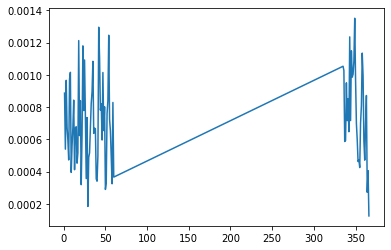

In [8]:
plt.plot(dc_traditional_climo['dayofyear'],dc_traditional_climo)

In [9]:
traditional_anoms=daily_values.groupby('time.dayofyear')-traditional_climo
traditional_anoms

<xarray.DataArray 'PRECTOTCORR' (time: 3760, lat: 55, lon: 107)>
array([[[-5.40877809e-04, -5.74166246e-04, -6.16764359e-04, ...,
          1.70361644e-04,  2.62841641e-05, -7.24465644e-06],
        [-4.48787585e-04, -4.50587424e-04, -5.44753275e-04, ...,
          2.14569664e-04,  1.40886259e-05, -4.24726750e-07],
        [-3.65297688e-04, -3.38012498e-04, -4.14654118e-04, ...,
          2.89173826e-04,  9.54153511e-05,  3.85138701e-05],
        ...,
        [-2.16679298e-03, -1.70991383e-03, -2.31080456e-04, ...,
         -7.17301446e-04, -8.25743948e-04, -9.23112209e-04],
        [-1.96909416e-03, -1.48135005e-03, -1.95507659e-04, ...,
         -6.35198667e-04, -7.78860005e-04, -8.64061411e-04],
        [-9.70954075e-04, -9.24851862e-04,  1.18479482e-04, ...,
         -6.15254452e-04, -7.10408378e-04, -7.37374532e-04]],

       [[-1.97918111e-04, -2.08068916e-04, -2.15105334e-04, ...,
          1.16520852e-04, -1.25633087e-05, -1.29146792e-05],
        [-2.14328698e-04, -2.00226816e-04, -2.02822266e-04, ...,
          2.43296687e-04,  9.94311122e-05,  3.96887190e-05],
        [-2.72408361e-04, -2.09359365e-04, -1.99992501e-04, ...,
          7.06299441e-04,  2.33915256e-04,  1.28637868e-04],
...
         -4.87874902e-04, -5.26514719e-04, -5.86749520e-04],
        [-8.57490231e-04, -1.08253304e-03, -1.23550929e-03, ...,
         -4.86087927e-04, -5.33233630e-04, -5.71361044e-04],
        [-6.83000195e-04, -6.28508162e-04, -7.02983118e-04, ...,
         -4.84808261e-04, -5.10299404e-04, -5.22830407e-04]],

       [[ 1.11900154e-05,  1.74115004e-04,  2.35819112e-04, ...,
         -2.00178794e-04, -1.33424706e-04, -1.30525965e-04],
        [ 4.56718262e-05,  3.02721630e-04,  3.07644921e-04, ...,
         -2.66420218e-04, -2.04482028e-04, -2.03640579e-04],
        [ 9.77041491e-05,  4.49264160e-04,  4.26263898e-04, ...,
         -2.89393822e-04, -2.55219260e-04, -2.27023484e-04],
        ...,
        [-1.48881180e-03, -1.19762577e-03, -7.88772712e-04, ...,
          1.53699622e-03,  1.72050577e-03,  1.76244345e-03],
        [-7.86776654e-04, -5.96610713e-04, -4.48681414e-04, ...,
          1.03178597e-03,  1.28388708e-03,  1.61557621e-03],
        [ 2.14449363e-04,  1.58888288e-05, -3.06830101e-04, ...,
          4.96999768e-04,  7.09146319e-04,  9.21435072e-04]]],
      dtype=float32)
Coordinates:
  * time       (time) datetime64[ns] 1980-01-01 1980-01-02 ... 2021-02-28
  * lon        (lon) float64 -126.9 -126.2 -125.6 ... -61.88 -61.25 -60.62
  * lat        (lat) float64 23.0 23.5 24.0 24.5 25.0 ... 48.5 49.0 49.5 50.0
    dayofyear  (time) int64 1 2 3 4 5 6 7 8 9 10 ... 51 52 53 54 55 56 57 58 59

In [10]:
traditional_anoms_norm=traditional_anoms/(traditional_anoms.std(dim='time'))
traditional_anoms_norm

<xarray.DataArray 'PRECTOTCORR' (time: 3760, lat: 55, lon: 107)>
array([[[-5.32189786e-01, -5.76835752e-01, -5.90429842e-01, ...,
          2.36901626e-01,  4.27517369e-02, -1.18735526e-02],
        [-5.19375324e-01, -5.12062967e-01, -5.98824263e-01, ...,
          2.74326622e-01,  1.98805835e-02, -6.39529375e-04],
        [-4.34505820e-01, -4.05287564e-01, -5.00718176e-01, ...,
          3.51302236e-01,  1.23781309e-01,  5.27829342e-02],
        ...,
        [-6.97229445e-01, -5.23832798e-01, -6.70387521e-02, ...,
         -5.37661076e-01, -5.75285912e-01, -6.07967734e-01],
        [-5.63927233e-01, -4.16251302e-01, -6.25129789e-02, ...,
         -4.91344422e-01, -5.51051676e-01, -5.75095713e-01],
        [-3.14576864e-01, -4.15268064e-01,  7.03186393e-02, ...,
         -4.16152000e-01, -4.51172858e-01, -4.78601158e-01]],

       [[-1.94738984e-01, -2.09036291e-01, -2.05920801e-01, ...,
          1.62031665e-01, -2.04344820e-02, -2.11663768e-02],
        [-2.48039469e-01, -2.27544606e-01, -2.22953945e-01, ...,
          3.11054021e-01,  1.40308112e-01,  5.97610138e-02],
        [-3.24017972e-01, -2.51028419e-01, -2.41502196e-01, ...,
          8.58046472e-01,  3.03455740e-01,  1.76297113e-01],
...
         -3.65691900e-01, -3.66816491e-01, -3.86437088e-01],
        [-2.45575920e-01, -3.04185897e-01, -3.95050347e-01, ...,
         -3.76002997e-01, -3.77268434e-01, -3.80282313e-01],
        [-2.21283451e-01, -2.82206684e-01, -4.17226791e-01, ...,
         -3.27919483e-01, -3.24085772e-01, -3.39348882e-01]],

       [[ 1.10102715e-02,  1.74924523e-01,  2.25750148e-01, ...,
         -2.78364778e-01, -2.17018038e-01, -2.13924140e-01],
        [ 5.28553389e-02,  3.44023228e-01,  3.38181049e-01, ...,
         -3.40617388e-01, -2.88546383e-01, -3.06630403e-01],
        [ 1.16214864e-01,  5.38681805e-01,  5.14737666e-01, ...,
         -3.51569504e-01, -3.31093192e-01, -3.11133772e-01],
        ...,
        [-4.79069054e-01, -3.66893113e-01, -2.28830859e-01, ...,
          1.15207207e+00,  1.19865572e+00,  1.16075683e+00],
        [-2.25324318e-01, -1.67644367e-01, -1.43464521e-01, ...,
          7.98116088e-01,  9.08363700e-01,  1.07528341e+00],
        [ 6.94788918e-02,  7.13424897e-03, -1.82106420e-01, ...,
          3.36165696e-01,  4.50371325e-01,  5.98067701e-01]]],
      dtype=float32)
Coordinates:
  * time       (time) datetime64[ns] 1980-01-01 1980-01-02 ... 2021-02-28
  * lon        (lon) float64 -126.9 -126.2 -125.6 ... -61.88 -61.25 -60.62
  * lat        (lat) float64 23.0 23.5 24.0 24.5 25.0 ... 48.5 49.0 49.5 50.0
    dayofyear  (time) int64 1 2 3 4 5 6 7 8 9 10 ... 51 52 53 54 55 56 57 58 59

In [11]:
traditional_anoms_norm_dc=traditional_anoms_norm.sel(lat=39,lon=-77,method='nearest')
traditional_anoms_norm_dc

<xarray.DataArray 'PRECTOTCORR' (time: 3760)>
array([-0.5233645 , -0.31834856, -0.49181944, ..., -0.24375091,
        1.1688942 ,  2.1577382 ], dtype=float32)
Coordinates:
  * time       (time) datetime64[ns] 1980-01-01 1980-01-02 ... 2021-02-28
    lon        float64 -76.88
    lat        float64 39.0
    dayofyear  (time) int64 1 2 3 4 5 6 7 8 9 10 ... 51 52 53 54 55 56 57 58 59

Text(0.5, 1.0, 'Traditional Anomalies for Washington DC')

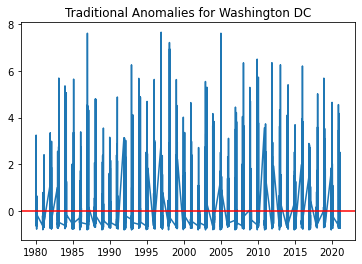

In [12]:
plt.plot(traditional_anoms_norm_dc['time'],traditional_anoms_norm_dc)
plt.axhline(y=0.0, color='r', linestyle='-')
plt.title('Traditional Anomalies for Washington DC')

In [13]:
#boxcar
window=3
rolling_mean=daily_values.rolling(time=window).mean(dim='time')
rolling_mean

/homes/areed29/.conda/envs/clim680/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: Reductions are applied along the rolling dimension(s) '['time']'. Passing the 'dim' kwarg to reduction operations has no effect.
  This is separate from the ipykernel package so we can avoid doing imports until


<xarray.DataArray 'PRECTOTCORR' (time: 3760, lat: 55, lon: 107)>
array([[[           nan,            nan,            nan, ...,
                    nan,            nan,            nan],
        [           nan,            nan,            nan, ...,
                    nan,            nan,            nan],
        [           nan,            nan,            nan, ...,
                    nan,            nan,            nan],
        ...,
        [           nan,            nan,            nan, ...,
                    nan,            nan,            nan],
        [           nan,            nan,            nan, ...,
                    nan,            nan,            nan],
        [           nan,            nan,            nan, ...,
                    nan,            nan,            nan]],

       [[           nan,            nan,            nan, ...,
                    nan,            nan,            nan],
        [           nan,            nan,            nan, ...,
                    nan,            nan,            nan],
        [           nan,            nan,            nan, ...,
                    nan,            nan,            nan],
...
        [1.22775184e-03, 1.25804963e-03, 1.32636190e-03, ...,
         1.26715036e-04, 1.69753024e-04, 2.90994853e-04],
        [1.82150246e-03, 1.71289314e-03, 1.37497706e-03, ...,
         9.99144395e-05, 1.54392299e-04, 2.31760656e-04],
        [2.12036166e-03, 1.40089053e-03, 6.34789583e-04, ...,
         9.38011799e-05, 1.32893954e-04, 1.70752450e-04]],

       [[2.10610611e-04, 2.37619199e-04, 2.92403216e-04, ...,
         7.74974906e-05, 1.02998070e-04, 1.06849693e-04],
        [2.27965415e-04, 2.96010519e-04, 3.06074129e-04, ...,
         4.93596017e-05, 6.31292933e-05, 6.81066813e-05],
        [2.53751059e-04, 3.63087573e-04, 3.55220051e-04, ...,
         3.68833134e-05, 3.91796311e-05, 4.07610205e-05],
        ...,
        [3.60651960e-04, 3.55552649e-04, 4.56456881e-04, ...,
         7.41649128e-04, 8.44831113e-04, 9.47499822e-04],
        [7.55741610e-04, 7.37781054e-04, 6.33808202e-04, ...,
         5.64501272e-04, 7.07404339e-04, 8.74984020e-04],
        [1.28431700e-03, 9.41711187e-04, 3.99549928e-04, ...,
         4.03894432e-04, 5.11464314e-04, 5.86578157e-04]]], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1980-01-01 1980-01-02 ... 2021-02-28
  * lon      (lon) float64 -126.9 -126.2 -125.6 -125.0 ... -61.88 -61.25 -60.62
  * lat      (lat) float64 23.0 23.5 24.0 24.5 25.0 ... 48.0 48.5 49.0 49.5 50.0

In [14]:
climo=rolling_mean.groupby('time.dayofyear').mean(dim='time')
climo

<xarray.DataArray 'PRECTOTCORR' (dayofyear: 92, lat: 55, lon: 107)>
array([[[0.00038387, 0.00039331, 0.00039051, ..., 0.00025388,
         0.00022148, 0.00022391],
        [0.00036286, 0.00033685, 0.00035258, ..., 0.00023861,
         0.00020705, 0.00020805],
        [0.00031367, 0.00030004, 0.00031893, ..., 0.00024185,
         0.00020777, 0.00019942],
        ...,
        [0.00225681, 0.00224167, 0.0022858 , ..., 0.00088183,
         0.00098062, 0.00103046],
        [0.00247938, 0.00244577, 0.00218088, ..., 0.00081684,
         0.00096838, 0.0010566 ],
        [0.00235256, 0.00175974, 0.00126645, ..., 0.0007802 ,
         0.00087277, 0.00091387]],

       [[0.0003888 , 0.00040342, 0.00040568, ..., 0.00017007,
         0.00017647, 0.0001816 ],
        [0.00035867, 0.00033758, 0.00035814, ..., 0.00016035,
         0.00015785, 0.00016938],
        [0.00032763, 0.00029115, 0.00030782, ..., 0.00015526,
         0.0001459 , 0.00015094],
...
        [0.00219906, 0.0021568 , 0.00213874, ..., 0.00089887,
         0.00099432, 0.00103569],
        [0.00236367, 0.0022885 , 0.00197561, ..., 0.00086004,
         0.00101015, 0.00108604],
        [0.00223311, 0.00166859, 0.0012118 , ..., 0.00084227,
         0.000932  , 0.00095467]],

       [[0.00020383, 0.00015743, 0.00013217, ..., 0.0005732 ,
         0.00061339, 0.00067007],
        [0.00018526, 0.00015729, 0.00013214, ..., 0.00064997,
         0.00053375, 0.00052452],
        [0.00017114, 0.00016034, 0.00014722, ..., 0.00059769,
         0.00047917, 0.00042049],
        ...,
        [0.00286511, 0.00293962, 0.00302979, ..., 0.0011007 ,
         0.00111637, 0.00118749],
        [0.00283847, 0.00285214, 0.0025862 , ..., 0.0010396 ,
         0.00109184, 0.00116616],
        [0.00232561, 0.00176362, 0.00152714, ..., 0.00108771,
         0.00113948, 0.00118494]]], dtype=float32)
Coordinates:
  * lon        (lon) float64 -126.9 -126.2 -125.6 ... -61.88 -61.25 -60.62
  * lat        (lat) float64 23.0 23.5 24.0 24.5 25.0 ... 48.5 49.0 49.5 50.0
  * dayofyear  (dayofyear) int64 1 2 3 4 5 6 7 8 ... 360 361 362 363 364 365 366

In [7]:
window=3
boxcar_1st=climo.rolling(dayofyear=window).mean(dim='time')
boxcar_1st

/homes/areed29/.conda/envs/clim680/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: Reductions are applied along the rolling dimension(s) '['dayofyear']'. Passing the 'dim' kwarg to reduction operations has no effect.
  


<xarray.DataArray '__xarray_dataarray_variable__' (dayofyear: 92, lat: 55, lon: 107)>
array([[[       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        ...,
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan]],

       [[       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
...
        [0.0023111 , 0.00225555, 0.00220981, ..., 0.00083467,
         0.00091497, 0.00096555],
        [0.00247492, 0.00239893, 0.0020726 , ..., 0.0007944 ,
         0.00092307, 0.00099031],
        [0.00232914, 0.0017557 , 0.00127014, ..., 0.00079139,
         0.00086809, 0.00087777]],

       [[0.0002824 , 0.00029528, 0.00028694, ..., 0.00044315,
         0.0004582 , 0.0004908 ],
        [0.00026752, 0.00027197, 0.00027544, ..., 0.00046077,
         0.0003998 , 0.00039805],
        [0.00024307, 0.00025923, 0.00027811, ..., 0.00041766,
         0.000361  , 0.0003363 ],
        ...,
        [0.00238347, 0.0023754 , 0.00239026, ..., 0.00096113,
         0.00103083, 0.00108796],
        [0.00248388, 0.00244426, 0.00216668, ..., 0.00090886,
         0.00102671, 0.00110767],
        [0.0022477 , 0.00171002, 0.00131893, ..., 0.00090267,
         0.00097866, 0.00100833]]], dtype=float32)
Coordinates:
  * lon        (lon) float64 -126.9 -126.2 -125.6 ... -61.88 -61.25 -60.62
  * lat        (lat) float64 23.0 23.5 24.0 24.5 25.0 ... 48.5 49.0 49.5 50.0
  * dayofyear  (dayofyear) int64 1 2 3 4 5 6 7 8 ... 360 361 362 363 364 365 366

In [8]:
window=3
boxcar_2nd=boxcar_1st.rolling(dayofyear=window).mean(dim='time')
boxcar_2nd

/homes/areed29/.conda/envs/clim680/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: Reductions are applied along the rolling dimension(s) '['dayofyear']'. Passing the 'dim' kwarg to reduction operations has no effect.
  


<xarray.DataArray '__xarray_dataarray_variable__' (dayofyear: 92, lat: 55, lon: 107)>
array([[[       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        ...,
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan]],

       [[       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
...
        [0.00243204, 0.00238853, 0.00234893, ..., 0.00079624,
         0.00088298, 0.00096457],
        [0.00261316, 0.00254406, 0.00220339, ..., 0.00074419,
         0.00087079, 0.00094621],
        [0.00242446, 0.0018189 , 0.00131534, ..., 0.00075762,
         0.00083663, 0.00084909]],

       [[0.00032349, 0.00036627, 0.00037421, ..., 0.00042484,
         0.00042426, 0.00044219],
        [0.00030133, 0.00032723, 0.00034666, ..., 0.00042251,
         0.00037975, 0.00038218],
        [0.00028345, 0.00030942, 0.00033671, ..., 0.00039639,
         0.00035107, 0.0003453 ],
        ...,
        [0.00236949, 0.00233556, 0.00230761, ..., 0.00085601,
         0.0009342 , 0.00099721],
        [0.00252162, 0.00246193, 0.00214351, ..., 0.00080876,
         0.00093144, 0.00100438],
        [0.00233397, 0.00176433, 0.00129978, ..., 0.00081036,
         0.00088546, 0.00090053]]], dtype=float32)
Coordinates:
  * lon        (lon) float64 -126.9 -126.2 -125.6 ... -61.88 -61.25 -60.62
  * lat        (lat) float64 23.0 23.5 24.0 24.5 25.0 ... 48.5 49.0 49.5 50.0
  * dayofyear  (dayofyear) int64 1 2 3 4 5 6 7 8 ... 360 361 362 363 364 365 366

In [9]:
dc_robust_climo=boxcar_2nd.sel(lat=39,lon=-77,method='nearest')
dc_robust_climo

<xarray.DataArray '__xarray_dataarray_variable__' (dayofyear: 92)>
array([       nan,        nan,        nan,        nan, 0.00071061,
       0.00071198, 0.00069223, 0.00068559, 0.000718  , 0.00073944,
       0.00071869, 0.00067581, 0.00064675, 0.00064305, 0.00062999,
       0.00061173, 0.00059506, 0.00060421, 0.00064639, 0.00071489,
       0.00075822, 0.00074586, 0.00069759, 0.00069424, 0.00075616,
       0.00083973, 0.000876  , 0.00082674, 0.00071599, 0.00058864,
       0.0004894 , 0.00045712, 0.00048264, 0.00057407, 0.00068841,
       0.00079819, 0.00086067, 0.00084697, 0.00077262, 0.00065187,
       0.00055272, 0.00052269, 0.00060342, 0.00075519, 0.00088312,
       0.00091592, 0.00086915, 0.00080634, 0.00078088, 0.00074594,
       0.0006924 , 0.00060219, 0.00056572, 0.00060605, 0.00072205,
       0.00082839, 0.00085167, 0.00078097, 0.00066487, 0.00058279,
       0.00056984, 0.00063096, 0.00071834, 0.00078819, 0.00079243,
       0.00076771, 0.00075108, 0.00077254, 0.00080314, 0.00082957,
       0.00086036, 0.00090244, 0.000951  , 0.00099297, 0.00103465,
       0.00107082, 0.00108843, 0.00103517, 0.00091859, 0.00075366,
       0.00062187, 0.0005424 , 0.00053409, 0.0005923 , 0.00069667,
       0.00081365, 0.00086141, 0.00082013, 0.00073037, 0.00065484,
       0.00062205, 0.00055091], dtype=float32)
Coordinates:
    lon        float64 -76.88
    lat        float64 39.0
  * dayofyear  (dayofyear) int64 1 2 3 4 5 6 7 8 ... 360 361 362 363 364 365 366

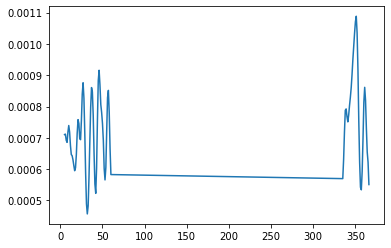

In [10]:
plt.plot(dc_robust_climo['dayofyear'],dc_robust_climo)

In [15]:
anoms_all=daily_values.groupby('time.dayofyear')-climo
anoms_all

<xarray.DataArray 'PRECTOTCORR' (time: 3760, lat: 55, lon: 107)>
array([[[-3.8386785e-04, -3.9331309e-04, -3.9051252e-04, ...,
          7.2843308e-05, -2.8975119e-05, -6.1816900e-05],
        [-3.6285678e-04, -3.3684864e-04, -3.5258068e-04, ...,
          1.1246375e-04, -4.6422356e-05, -5.3014519e-05],
        [-3.1366679e-04, -3.0003834e-04, -3.1892757e-04, ...,
          1.7231907e-04,  1.7463419e-05, -2.5009344e-05],
        ...,
        [-1.8402843e-03, -1.4075560e-03,  1.6706111e-04, ...,
         -8.7815407e-04, -9.7977428e-04, -1.0288763e-03],
        [-1.6563358e-03, -1.1162474e-03,  2.4026353e-04, ...,
         -8.1658026e-04, -9.6813892e-04, -1.0562764e-03],
        [-6.9564511e-04, -7.4650999e-04,  2.4616846e-04, ...,
         -7.7978708e-04, -8.7173562e-04, -9.1131241e-04]],

       [[-3.8879458e-04, -4.0341262e-04, -4.0567509e-04, ...,
          6.6791894e-05, -5.2083080e-05, -5.5016484e-05],
        [-3.5866647e-04, -3.3756651e-04, -3.5813006e-04, ...,
          2.1951411e-04,  8.2878410e-05,  2.1345550e-05],
        [-3.2761600e-04, -2.9111723e-04, -3.0775915e-04, ...,
          7.0705666e-04,  2.3676356e-04,  1.3269346e-04],
...
        [-1.1184771e-03, -1.2367415e-03, -1.4608100e-03, ...,
         -7.2397501e-04, -8.0295181e-04, -8.8458351e-04],
        [-1.0821077e-03, -1.2861798e-03, -1.3650295e-03, ...,
         -6.9214916e-04, -7.9096871e-04, -8.5892039e-04],
        [-8.4984000e-04, -6.9230224e-04, -6.8037258e-04, ...,
         -6.9778843e-04, -7.5171381e-04, -7.6848711e-04]],

       [[-2.1040783e-04, -1.0296528e-04, -1.8811785e-05, ...,
         -2.0050484e-04, -1.7796243e-04, -1.7495334e-04],
        [-9.9493773e-05,  9.4456918e-05,  8.3267456e-05, ...,
         -2.4680808e-04, -2.2021803e-04, -2.2420718e-04],
        [-4.7016540e-05,  2.8290608e-04,  2.5173556e-04, ...,
         -2.7125358e-04, -2.5855409e-04, -2.4741818e-04],
        ...,
        [-1.1645450e-03, -9.2384475e-04, -6.0958136e-04, ...,
          1.5202027e-03,  1.7029381e-03,  1.7530039e-03],
        [-3.9479439e-04, -2.6152411e-04, -2.7237111e-04, ...,
          9.9041592e-04,  1.2380228e-03,  1.5651230e-03],
        [ 5.6342839e-04,  1.6779907e-04, -2.6231748e-04, ...,
          4.8366189e-04,  6.8612944e-04,  8.5696258e-04]]], dtype=float32)
Coordinates:
  * time       (time) datetime64[ns] 1980-01-01 1980-01-02 ... 2021-02-28
  * lon        (lon) float64 -126.9 -126.2 -125.6 ... -61.88 -61.25 -60.62
  * lat        (lat) float64 23.0 23.5 24.0 24.5 25.0 ... 48.5 49.0 49.5 50.0
    dayofyear  (time) int64 1 2 3 4 5 6 7 8 9 10 ... 51 52 53 54 55 56 57 58 59

In [16]:
anoms_all.to_netcdf('/project/xprecip/merra2_ncfiles/precip/anomalies/daily_precip_anoms_nonorm_noshift_10-6-22.nc')

In [17]:
# Normalize by standard deviation
norm_anoms=anoms_all/(anoms_all.std(dim='time'))
norm_anoms

<xarray.DataArray 'PRECTOTCORR' (time: 3760, lat: 55, lon: 107)>
array([[[-3.75228643e-01, -3.91993970e-01, -3.70777786e-01, ...,
          1.00258842e-01, -4.67205569e-02, -1.00477591e-01],
        [-4.17272270e-01, -3.79756302e-01, -3.84351522e-01, ...,
          1.42241910e-01, -6.48401007e-02, -7.90996328e-02],
        [-3.70610803e-01, -3.57019156e-01, -3.82032216e-01, ...,
          2.07185254e-01,  2.24112906e-02, -3.39414887e-02],
        ...,
        [-5.87371826e-01, -4.28017616e-01,  4.81225885e-02, ...,
         -6.52607083e-01, -6.76240802e-01, -6.71520710e-01],
        [-4.70628083e-01, -3.11334878e-01,  7.62946382e-02, ...,
         -6.26360238e-01, -6.78528905e-01, -6.96455956e-01],
        [-2.23637491e-01, -3.32901239e-01,  1.45105720e-01, ...,
         -5.22985756e-01, -5.48709452e-01, -5.86305857e-01]],

       [[-3.80044490e-01, -4.02059615e-01, -3.85174096e-01, ...,
          9.19298977e-02, -8.39806944e-02, -8.94241557e-02],
        [-4.12453562e-01, -3.80565614e-01, -3.90400946e-01, ...,
          2.77637094e-01,  1.15759842e-01,  3.18483524e-02],
        [-3.87092382e-01, -3.46403837e-01, -3.68653953e-01, ...,
          8.50119054e-01,  3.03845257e-01,  1.80085227e-01],
...
         -5.38027704e-01, -5.54197848e-01, -5.77344596e-01],
        [-3.07467997e-01, -3.58731091e-01, -4.33459163e-01, ...,
         -5.30915022e-01, -5.54357588e-01, -5.66329300e-01],
        [-2.73208410e-01, -3.08727652e-01, -4.01050389e-01, ...,
         -4.67991114e-01, -4.73162323e-01, -4.94417131e-01]],

       [[-2.05672458e-01, -1.02619946e-01, -1.78611223e-02, ...,
         -2.75967479e-01, -2.86953211e-01, -2.84370303e-01],
        [-1.14414267e-01,  1.06488809e-01,  9.07706395e-02, ...,
         -3.12157959e-01, -3.07588011e-01, -3.34525436e-01],
        [-5.55520616e-02,  3.36633295e-01,  3.01545262e-01, ...,
         -3.26137692e-01, -3.31809640e-01, -3.35784137e-01],
        ...,
        [-3.71693045e-01, -2.80927956e-01, -1.75592229e-01, ...,
          1.12975049e+00,  1.17536891e+00,  1.14413989e+00],
        [-1.12176120e-01, -7.29422346e-02, -8.64902586e-02, ...,
          7.59701371e-01,  8.67679477e-01,  1.03196406e+00],
        [ 1.81132182e-01,  7.48288929e-02, -1.54624879e-01, ...,
          3.24381202e-01,  4.31880593e-01,  5.51339090e-01]]],
      dtype=float32)
Coordinates:
  * time       (time) datetime64[ns] 1980-01-01 1980-01-02 ... 2021-02-28
  * lon        (lon) float64 -126.9 -126.2 -125.6 ... -61.88 -61.25 -60.62
  * lat        (lat) float64 23.0 23.5 24.0 24.5 25.0 ... 48.5 49.0 49.5 50.0
    dayofyear  (time) int64 1 2 3 4 5 6 7 8 9 10 ... 51 52 53 54 55 56 57 58 59

In [18]:
norm_anoms.to_netcdf('/project/xprecip/merra2_ncfiles/precip/anomalies/daily_precip_norm_anoms_noshift_10-6-22.nc')

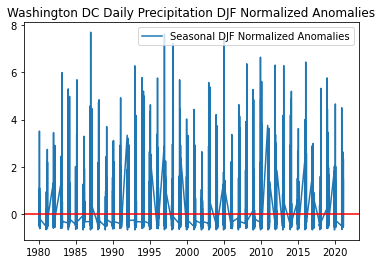

In [19]:
dc_anoms=norm_anoms.sel(lat=39,lon=-77,method='nearest')
plt.plot(dc_anoms['time'],dc_anoms)
plt.axhline(y=0.0, color='r', linestyle='-')
plt.title('Washington DC Daily Precipitation DJF Normalized Anomalies')
plt.legend(['Seasonal DJF Normalized Anomalies'])
#plt.savefig('/homes/areed29/CLIM997/summer22_research/washington_precip_seasonalDJFnormanoms_06z')